In [ ]:
import pandas as pd
import re

from google.colab import files

In [ ]:
# Cargar el archivo desde la computadora
uploaded = files.upload()

def extraer_renglon_y_fecha_de_frames(archivo, renglon_objetivo):
    with open(archivo, 'r') as file:
        lines = file.readlines()

    resultados = []
    frame_lines = []
    fecha_actual = None
    dentro_de_frame = False

    # Regular expression to extract distance to Earth in AU
    distancia_regex = re.compile(r"Distance to Earth \[AU\]:\s*([0-9\.]+)")

    for line in lines:
        # Detecta el inicio de un frame y extrae la fecha
        if line.startswith("Frame"):
            fecha_actual = line.split("Date:")[1].split("UT:")[0].strip()  # Extrae la fecha
            if frame_lines:  # Si hay líneas acumuladas, es el final del frame anterior
                if len(frame_lines) > renglon_objetivo:
                    # Extrae la distancia usando la expresión regular
                    match = distancia_regex.search(frame_lines[renglon_objetivo])
                    if match:
                        distancia = match.group(1)  # La distancia extraída
                        resultados.append((fecha_actual, distancia))
                frame_lines = []

            dentro_de_frame = True  # Marca que estás en un frame nuevo

        if dentro_de_frame:
            frame_lines.append(line.strip())  # Guarda las líneas del frame actual

    # Para el último frame
    if len(frame_lines) > renglon_objetivo:
        match = distancia_regex.search(frame_lines[renglon_objetivo])
        if match:
            distancia = match.group(1)
            resultados.append((fecha_actual, distancia))

    return resultados

# Configuración
nombre_archivo = list(uploaded.keys())[0]  # Toma el nombre del archivo subido
renglon_a_extraer = 36  # Por ejemplo, el 4to renglón (índice 3)

# Ejecutar
renglones_y_fechas = extraer_renglon_y_fecha_de_frames(nombre_archivo, renglon_a_extraer)

# Crear DataFrame con fecha y distancia a la Tierra en AU
df = pd.DataFrame(renglones_y_fechas, columns=["Date", "Distance_to_Earth_AU"])

# Imprimir el DataFrame
#print(df)
display(df)
# Opcional: Guardar el DataFrame a un archivo CSV
#df.to_csv("resultados.csv", index=False)

Saving spiral_data.txt to spiral_data (3).txt


,Date,Distance_to_Earth_AU
0,23-Jan-2008 18:35,2.293
1,23-Jan-2008 20:30,2.278
2,23-Jan-2008 22:26,2.264
3,24-Jan-2008 00:22,2.250
4,24-Jan-2008 02:17,2.236
...,...,...
355,21-Feb-2008 06:40,2.361
356,21-Feb-2008 08:35,2.347
357,21-Feb-2008 10:31,2.334
358,21-Feb-2008 12:27,2.320


In [ ]:
!pip install smplotlib

import smplotlib

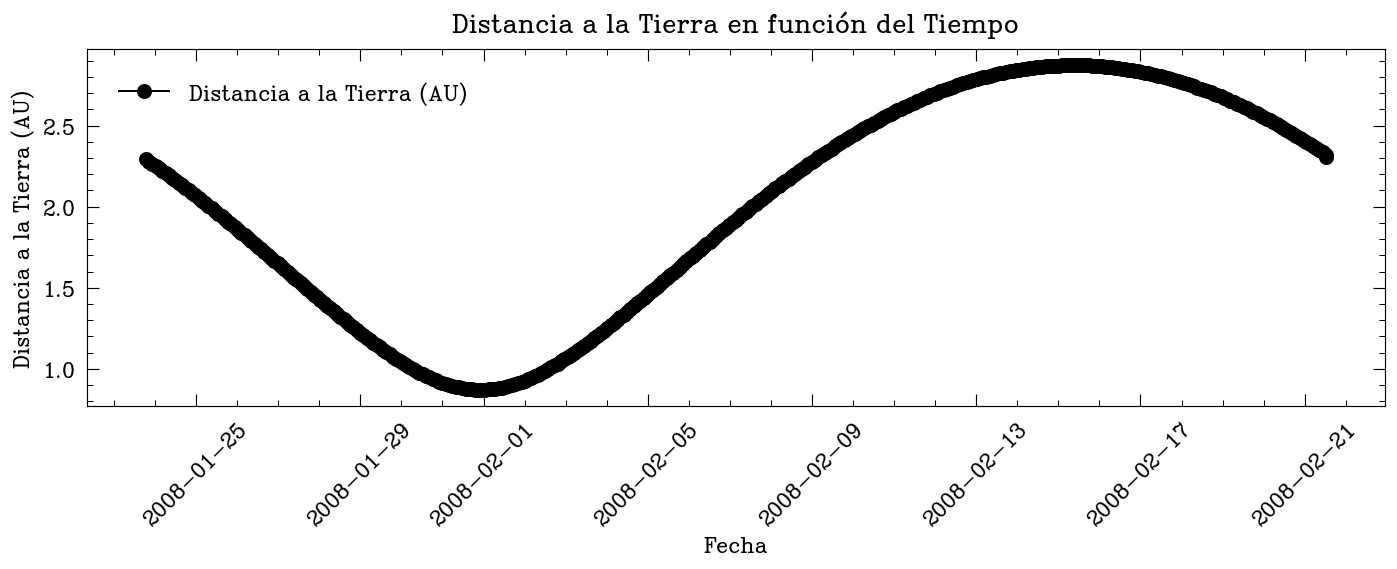

In [ ]:
import matplotlib.pyplot as plt

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convertir la columna de distancia a tipo numérico
df['Distance_to_Earth_AU'] = pd.to_numeric(df['Distance_to_Earth_AU'])

# Remover filas con valores nulos (por si hay errores de conversión)
df.dropna(inplace=True)

# Crear el gráfico
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Distance_to_Earth_AU'], marker='o', linestyle='-', color='black', label='Distancia a la Tierra (AU)')
plt.xlabel('Fecha')
plt.ylabel('Distancia a la Tierra (AU)')
plt.title('Distancia a la Tierra en función del Tiempo')
plt.grid(False)
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas de fecha para mejor legibilidad
plt.tight_layout()
plt.show()
